#### Chloride Statistic

### Se importan las librerias

In [2]:
# Se importan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

### Se cargan los datos

In [3]:
datos = pd.read_csv("data/data_all.csv", sep=";")

datos

,date,date(m/d/y),time,day,concentration,chloride_80ft(mg/L),chloride_1100ft(mg/L),difference_chloride,CL2_80ft(PPM),CL2_1100ft(PPM),...,difference_ORP_YSI,pH_YSI_80ft,pH_YSI_1100ft,difference_pH,sp_cond_YSI_80ft(µS/cm),sp_cond_YSI_1100ft(µS/cm),difference_sp_cond_YSI,turbidity_YSI_80ft(NTU+),turbidity_YSI_1100ft(NTU+),difference_turbidity
0,25/01/05 12:30,25/01/05,12.30,1,0.0,16.33,17.02,0.69,1.02,1.05,...,75,7.23,8.68,1.45,281,284,3,0.5,0.1,-0.4
1,25/01/05 12:31,25/01/05,12.31,1,0.0,16.39,17.12,0.73,1.02,1.05,...,75,7.22,8.67,1.45,281,283,2,0.8,0.1,-0.7
2,25/01/05 12:32,25/01/05,12.32,1,0.0,16.39,17.12,0.73,1.02,1.05,...,75,7.22,8.68,1.46,281,283,2,0.8,0.1,-0.7
3,25/01/05 12:33,25/01/05,12.33,1,0.0,16.38,17.11,0.73,1.02,1.04,...,76,7.22,8.68,1.46,281,283,2,0.8,0.1,-0.7
4,25/01/05 12:34,25/01/05,12.34,1,0.0,16.39,17.03,0.64,1.02,1.04,...,76,7.22,8.68,1.46,281,284,3,0.7,0.1,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,26/01/05 15:56,26/01/05,15.56,2,3.0,16.37,17.93,1.56,1.00,1.02,...,95,7.17,8.72,1.55,287,289,2,0.8,0.0,-0.8
622,26/01/05 15:57,26/01/05,15.57,2,3.0,16.38,17.92,1.54,1.00,1.01,...,96,7.17,8.72,1.55,287,289,2,0.9,0.0,-0.9
623,26/01/05 15:58,26/01/05,15.58,2,3.0,16.37,17.90,1.53,1.00,1.01,...,96,7.17,8.71,1.54,287,289,2,0.8,0.0,-0.8
624,26/01/05 15:59,26/01/05,15.59,2,3.0,16.35,17.91,1.56,1.00,1.01,...,97,7.16,8.71,1.55,287,289,2,0.9,0.0,-0.9


### Número de grupos, observaciones por grupo y distribución de las observaciones

In [15]:
# Número de observaciones por grupo
datos.groupby('concentration').size()

concentration
0.0    182
0.4    146
1.5    150
3.0    148
dtype: int64

In [16]:
# Media y desviación típica por grupo
datos.groupby('concentration').agg(['mean','std'])

/var/folders/0m/xmkg_d4s05j9zcbpwwncd19w0000gn/T/ipykernel_9181/1821354023.py:2: FutureWarning: ['date', 'date(m/d/y)'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  datos.groupby('concentration').agg(['mean','std'])


time                 day           chloride_80ft(mg/L)  \
                    mean       std      mean       std                mean   
concentration                                                                
0.0            13.219505  1.801482  1.510989  0.501258           16.231978   
0.4            12.232534  1.297871  1.500000  0.501721           16.247877   
1.5            14.233667  0.854822  1.500000  0.501675           16.513533   
3.0            15.916554  0.855403  1.506757  0.501652           16.565743   

                        chloride_1100ft(mg/L)           difference_chloride  \
                    std                  mean       std                mean   
concentration                                                                 
0.0            0.239536             17.208352  0.492617            0.976374   
0.4            0.250189             17.231027  0.297888            0.983151   
1.5            0.232374             17.441267  0.535817            0.927733   
3.0            0.250227             17.438581  0.619067            0.872838   

                         ... sp_cond_YSI_1100ft(µS/cm)            \
                    std  ...                      mean       std   
concentration            ...                                       
0.0            0.519210  ...                285.906593  2.153517   
0.4            0.507066  ...                285.931507  2.076660   
1.5            0.678965  ...                285.973333  2.151780   
3.0            0.688168  ...                286.358108  2.499007   

              difference_sp_cond_YSI           turbidity_YSI_80ft(NTU+)  \
                                mean       std                     mean   
concentration                                                             
0.0                         2.379121  0.598528                 0.737363   
0.4                         2.458904  0.500024                 0.736986   
1.5                         2.273333  0.694143                 0.749333   
3.0                         2.290541  0.682666                 0.759459   

                        turbidity_YSI_1100ft(NTU+)            \
                    std                       mean       std   
concentration                                                  
0.0            0.154954                   0.063187  0.087423   
0.4            0.132360                   0.096575  0.141623   
1.5            0.170961                   0.073333  0.098762   
3.0            0.207623                   0.041892  0.057159   

              difference_turbidity            
                              mean       std  
concentration                                 
0.0                      -0.674176  0.173502  
0.4                      -0.640411  0.193900  
1.5                      -0.676000  0.185255  
3.0                      -0.717568  0.213081  

[4 rows x 58 columns]

#### Análisis Gráfico

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 22.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


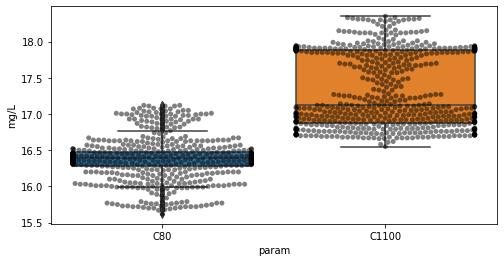

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="param", y="mg/L", data=datos, ax=ax)
sns.swarmplot(x="param", y="mg/L", data=datos, color='black', alpha = 0.5, ax=ax);

## Verificar condiciones para ANOVA

#### Distribución normal de las observaciones

In [13]:
'''
# Test de normalidad Shapiro-Wilk
pg.normality(data=datos, dv='mg/L', group='param')
'''

"\n# Test de normalidad Shapiro-Wilk\npg.normality(data=datos, dv='mg/L', group='param')\n"

#### Varianza constante entre grupos (homocedasticidad)

In [14]:
'''
# Test de homocedasticidad
pg.homoscedasticity(data=datos, dv='mg/L', group='param', method='levene')
'''

"\n# Test de homocedasticidad\npg.homoscedasticity(data=datos, dv='mg/L', group='param', method='levene')\n"

#### Test ANOVA

In [15]:
# Se agrupan los datos
datos_agrupados = datos[['param','mg/L']].groupby(['param'])
datos_agrupados.head(3)

,param,mg/L
0,C80,16.33
1,C80,16.39
2,C80,16.39
618,C1100,17.02
619,C1100,17.12
620,C1100,17.12


In [16]:
# Test ANOVA de una vía (One-way ANOVA)
from scipy import stats

f_val, p_val = stats.f_oneway(datos_agrupados.get_group('C80')['mg/L'], datos_agrupados.get_group('C1100')['mg/L'])

print( "Resultados ANOVA: F=", f_val, ", P =", p_val) 

Resultados ANOVA: F= 1613.924880409599 , P = 2.3801237481887416e-226


#### Conclusión:

Este es un gran resultado, con un puntaje de prueba F grande que muestra una fuerte correlación y un valor de P de casi 0 que implica una significación estadística casi segura. 